In [101]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file into a DataFrame
data_df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

# Split the data into training and testing sets
train_df, test_df = train_test_split(data_df, test_size=0.2, random_state=42)

# Now, train_df contains 80% of the data, and test_df contains 20%


In [103]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [104]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,448.234551,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,453.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [105]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C


In [106]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,553,77.7
Age,140,19.7
Embarked,2,0.3
PassengerId,0,0.0
Survived,0,0.0


In [107]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<ipython-input-108-b1095ef171e7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
<ipython-input-108-b1095ef171e7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==0]

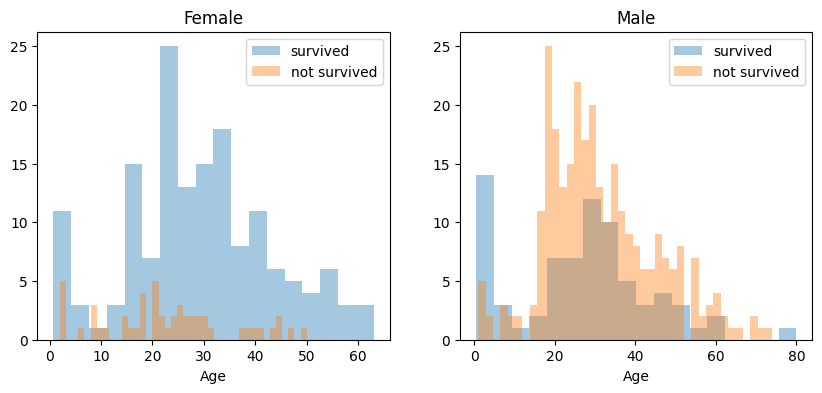

In [108]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

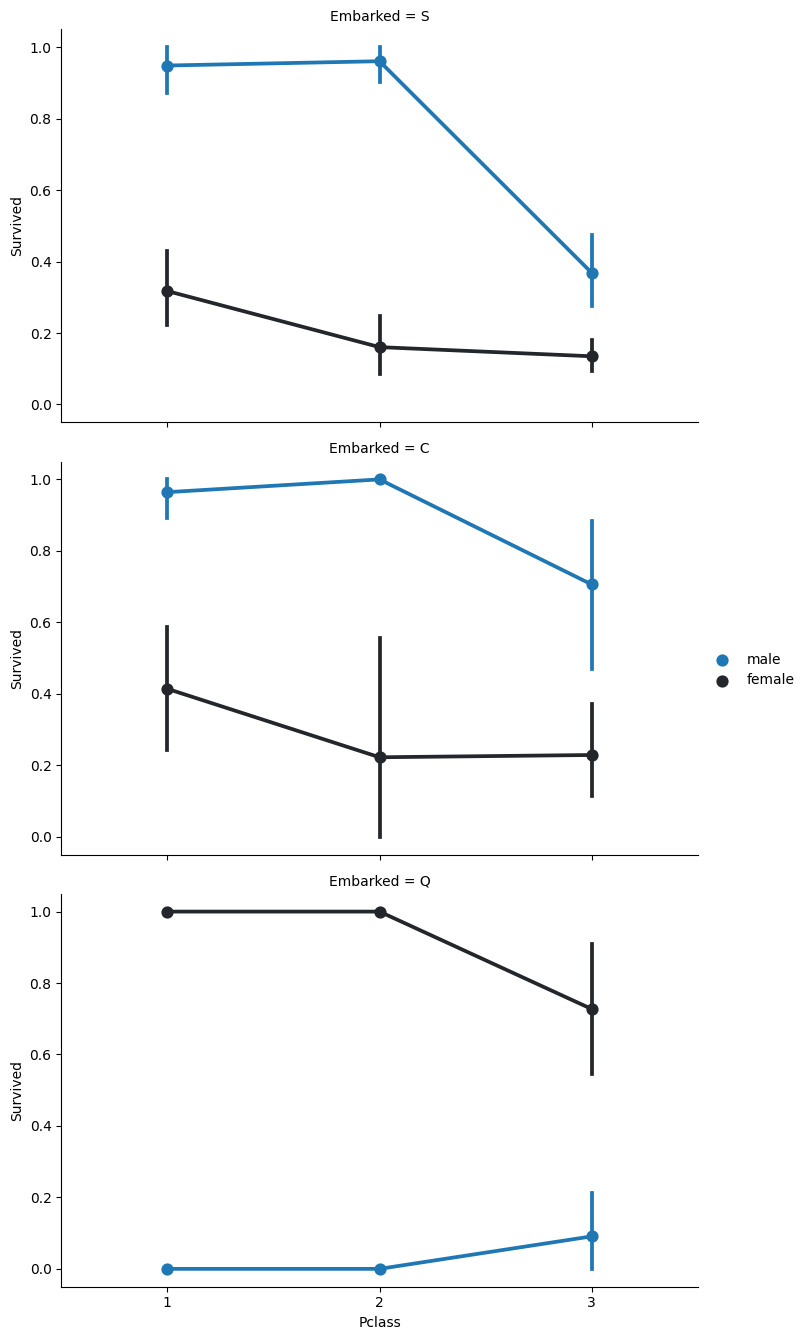

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None)
FacetGrid.add_legend()

plt.show()


<Axes: xlabel='Pclass', ylabel='Survived'>

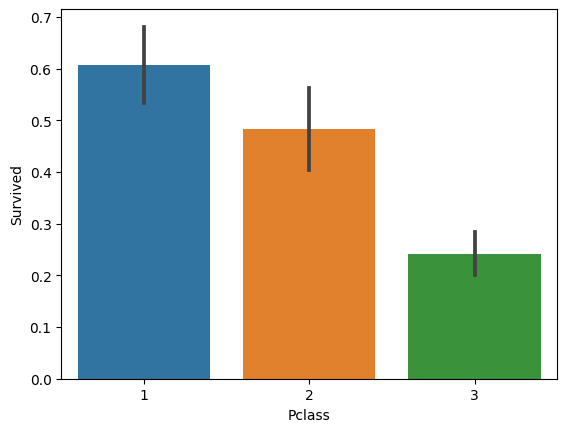

In [110]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

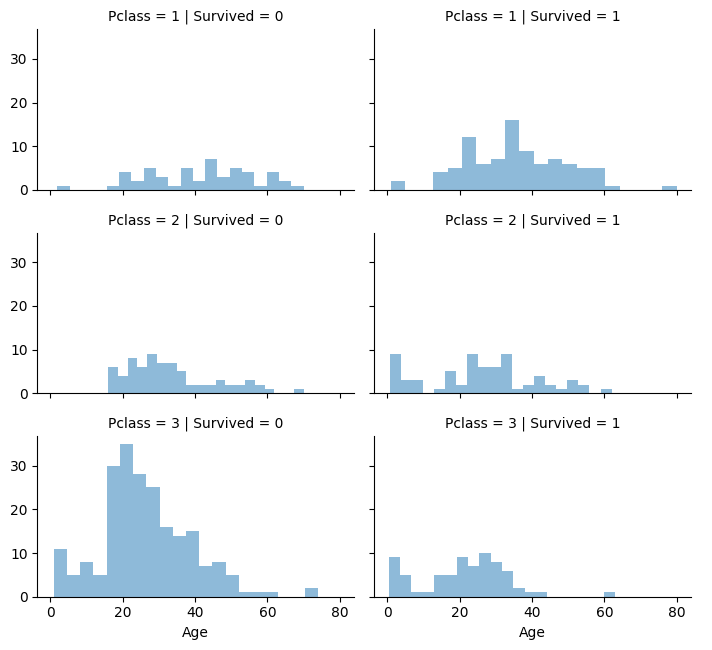

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

plt.show()


In [112]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    429
0    283
Name: not_alone, dtype: int64

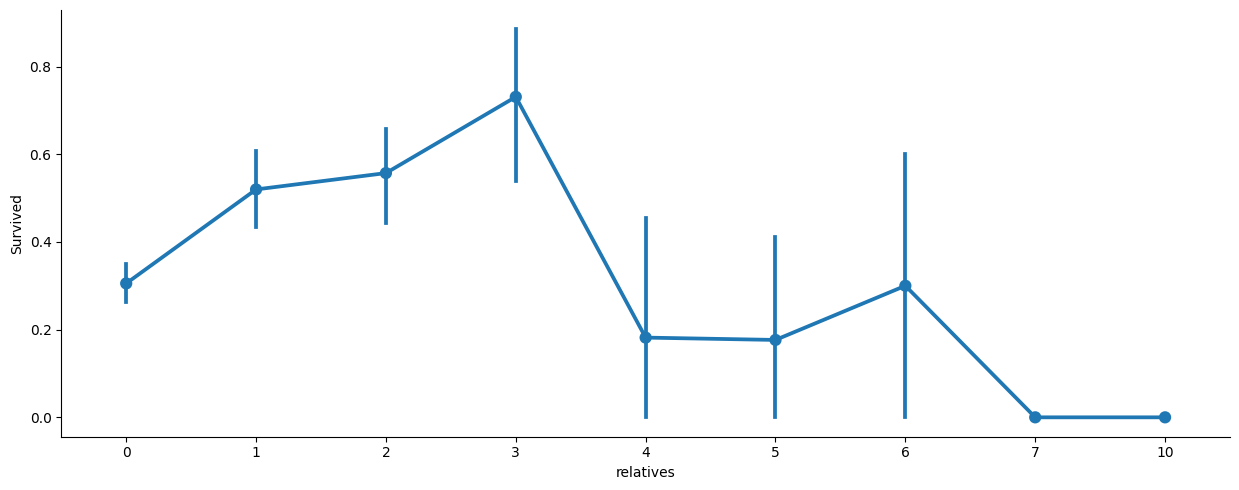

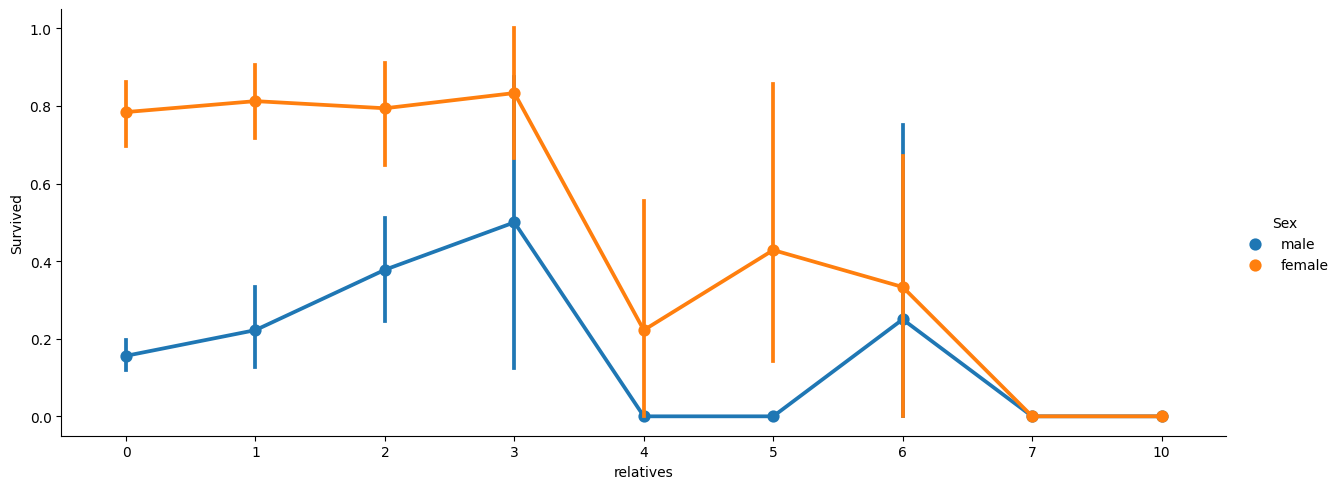

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'relatives' is a column in your DataFrame
sns.catplot(x='relatives', y='Survived', data=train_df, aspect=2.5, kind='point')
plt.show()
sns.catplot(x='relatives', y='Survived', hue='Sex', data=train_df, aspect=2.5, kind='point')
plt.show()


In [114]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [115]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [116]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [117]:
train_df['Embarked'].describe()

count     710
unique      3
top         S
freq      525
Name: Embarked, dtype: object

In [118]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   712 non-null    int64  
 1   Pclass     712 non-null    int64  
 2   Name       712 non-null    object 
 3   Sex        712 non-null    object 
 4   Age        712 non-null    int64  
 5   SibSp      712 non-null    int64  
 6   Parch      712 non-null    int64  
 7   Ticket     712 non-null    object 
 8   Fare       712 non-null    float64
 9   Embarked   712 non-null    object 
 10  relatives  712 non-null    int64  
 11  not_alone  712 non-null    int64  
 12  Deck       712 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 94.0+ KB


In [120]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [121]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [122]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [123]:
train_df['Ticket'].describe()

count          712
unique         558
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [124]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [125]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [133]:
# Check for non-finite values in 'Age'
print(train_df['Age'].isna().sum())


0


In [134]:
# Fill non-finite values with the median
median_age = train_df['Age'].median()
train_df['Age'].fillna(median_age, inplace=True)


In [135]:
# Apply age grouping
train_df.loc[train_df['Age'] <= 11, 'Age'] = 0
train_df.loc[(train_df['Age'] > 11) & (train_df['Age'] <= 18), 'Age'] = 1
train_df.loc[(train_df['Age'] > 18) & (train_df['Age'] <= 22), 'Age'] = 2
train_df.loc[(train_df['Age'] > 22) & (train_df['Age'] <= 27), 'Age'] = 3
train_df.loc[(train_df['Age'] > 27) & (train_df['Age'] <= 33), 'Age'] = 4
train_df.loc[(train_df['Age'] > 33) & (train_df['Age'] <= 40), 'Age'] = 5
train_df.loc[(train_df['Age'] > 40) & (train_df['Age'] <= 66), 'Age'] = 6
train_df.loc[train_df['Age'] > 66, 'Age'] = 6


In [136]:
# Display the distribution of 'Age' in the training dataset
print(train_df['Age'].value_counts())


0    712
Name: Age, dtype: int64


In [137]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
331,0,1,0,0,0,0,28,0,0,1,3,1
733,0,2,0,0,0,0,13,0,0,1,8,1
382,0,3,0,0,0,0,7,0,0,1,8,1
704,0,3,0,0,1,0,7,0,1,0,8,1
813,0,3,1,0,4,2,31,0,6,0,8,2
118,0,1,0,0,0,1,247,1,1,0,2,1
536,0,1,0,0,0,0,26,0,0,1,2,5
361,0,2,0,0,1,0,27,1,1,0,8,1
29,0,3,0,0,0,0,7,0,0,1,8,1
55,1,1,0,0,0,0,35,0,0,1,3,1


In [138]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [139]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [140]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
331,0,1,0,0,0,0,2,0,0,1,3,1,0,2
733,0,2,0,0,0,0,1,0,0,1,8,1,0,1
382,0,3,0,0,0,0,0,0,0,1,8,1,0,0
704,0,3,0,0,1,0,0,0,1,0,8,1,0,0
813,0,3,1,0,4,2,2,0,6,0,8,2,0,0
118,0,1,0,0,0,1,4,1,1,0,2,1,0,2
536,0,1,0,0,0,0,2,0,0,1,2,5,0,2
361,0,2,0,0,1,0,2,1,1,0,8,1,0,1
29,0,3,0,0,0,0,0,0,0,1,8,1,0,0
55,1,1,0,0,0,0,3,0,0,1,3,1,0,3


In [141]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [142]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Assuming your target variable is 'Survived'
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Check for non-numeric columns and drop them
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
X = X.drop(non_numeric_columns, axis=1)

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SGDClassifier model
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgd.predict(X_test)

# Calculate and print the accuracy score
acc_sgd = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy of SGD Classifier:", acc_sgd)


Accuracy of SGD Classifier: 72.03


In [143]:
# Print unique values in each column of X_train
for column in X_train.columns:
    unique_values = X_train[column].unique()
    print(f"Unique values in {column}:", unique_values)


Unique values in Pclass: [3 2 1]
Unique values in Sex: [0 1]
Unique values in Age: [0]
Unique values in SibSp: [0 8 1 3 2 4 5]
Unique values in Parch: [0 2 1 3 5 6 4]
Unique values in Fare: [2 3 1 4 0 5]
Unique values in Embarked: [2 0 1]
Unique values in relatives: [ 0 10  3  1  5  2  6  4  7]
Unique values in not_alone: [1 0]
Unique values in Deck: [8 3 2 5 6 1 4 7]
Unique values in Title: [1 2 3 4 5]
Unique values in Age_Class: [0]
Unique values in Fare_Per_Person: [2 0 1 3 4 5]


In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming your target variable is 'Survived'
X = train_df.drop(['Survived', 'Age'], axis=1)  # Drop 'Age' column
y = train_df['Survived']

# Identify and handle categorical columns using one-hot encoding
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Convert string labels to numerical labels for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure that the testing data has the same columns as the training data
# You may need to preprocess 'test_df' similarly to 'train_df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_prediction = random_forest.predict(X_test)

# Calculate and print the accuracy score
acc_random_forest = round(accuracy_score(y_test, y_prediction) * 100, 2)
print("Accuracy of Random Forest Classifier:", acc_random_forest)


Accuracy of Random Forest Classifier: 81.12


In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming your target variable is 'Survived'
X = train_df.drop(['Survived', 'Age'], axis=1)  # Drop 'Age' column
y = train_df['Survived']

# Check if 'AgeGroup' is in the columns
if 'AgeGroup' in X.columns:
    # Encode 'AgeGroup' using one-hot encoding
    X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)
else:
    print("Error: 'AgeGroup' column not found in the training data.")

# Convert string labels to numerical labels for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure that the testing data has the same columns as the training data
# You may need to preprocess 'test_df' similarly to 'train_df'

# Check if the columns in testing data match those in training data
if set(X.columns) == set(test_df.drop('Age', axis=1).columns):
    # Encode 'AgeGroup' in the testing data
    test_df = pd.get_dummies(test_df, columns=['AgeGroup'], drop_first=True)
else:
    print("Error: Columns in testing data do not match those in training data.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate and print the accuracy score
acc_log = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy of Logistic Regression:", acc_log)


Error: 'AgeGroup' column not found in the training data.
Error: Columns in testing data do not match those in training data.
Accuracy of Logistic Regression: 78.32


In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming your target variable is 'Survived'
X = train_df.drop(['Survived', 'Age'], axis=1)  # Drop 'Age' column
y = train_df['Survived']

# Create 'AgeGroup' based on the provided code
age_bins = [0, 11, 18, 22, 27, 33, 40, 66, 150]
age_labels = [f'{i}-{j}' for i, j in zip(age_bins[:-1], age_bins[1:])]
X['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Encode 'AgeGroup' using one-hot encoding
X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)

# Convert string labels to numerical labels for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure that the testing data has the same columns as the training data
# You may need to preprocess 'test_df' similarly to 'train_df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose the number of neighbors (you can adjust this parameter)
k_neighbors = 5

# Create and train the K Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=k_neighbors)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate and print the accuracy score
acc_knn = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Accuracy of K Nearest Neighbors (K={k_neighbors}): {acc_knn}%")


Accuracy of K Nearest Neighbors (K=5): 81.82%


In [155]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming your target variable is 'Survived'
X = train_df.drop(['Survived', 'Age'], axis=1)  # Drop 'Age' column
y = train_df['Survived']

# Create 'AgeGroup' based on the provided code
age_bins = [0, 11, 18, 22, 27, 33, 40, 66, 150]
age_labels = [f'{i}-{j}' for i, j in zip(age_bins[:-1], age_bins[1:])]
X['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Encode 'AgeGroup' using one-hot encoding
X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)

# Convert string labels to numerical labels for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure that the testing data has the same columns as the training data
# You may need to preprocess 'test_df' similarly to 'train_df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Calculate and print the accuracy score
acc_gnb = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Accuracy of Gaussian Naive Bayes: {acc_gnb}%")


Accuracy of Gaussian Naive Bayes: 71.33%


In [164]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming your target variable is 'Survived'
X = train_df.drop(['Survived', 'Age'], axis=1)  # Drop 'Age' column

# Create 'AgeGroup' based on the provided code
age_bins = [0, 11, 18, 22, 27, 33, 40, 66, 150]
age_labels = [f'{i}-{j}' for i, j in zip(age_bins[:-1], age_bins[1:])]
X['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Encode 'AgeGroup' using one-hot encoding
X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)

# Convert string labels to numerical labels for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_df['Survived'])

# Ensure that the testing data has the same columns as the training data
# You may need to preprocess 'test_df' similarly to 'train_df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but often recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Perceptron model
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test_scaled)

# Calculate and print the accuracy score
acc_perceptron = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Accuracy of Perceptron: {acc_perceptron}%")


Accuracy of Perceptron: 69.93%


In [165]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming your target variable is 'Survived'
X = train_df.drop(['Survived', 'Age'], axis=1)  # Drop 'Age' column

# Create 'AgeGroup' based on the provided code
age_bins = [0, 11, 18, 22, 27, 33, 40, 66, 150]
age_labels = [f'{i}-{j}' for i, j in zip(age_bins[:-1], age_bins[1:])]
X['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Encode 'AgeGroup' using one-hot encoding
X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)

# Convert string labels to numerical labels for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_df['Survived'])

# Ensure that the testing data has the same columns as the training data
# You may need to preprocess 'test_df' similarly to 'train_df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Linear SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)

# Calculate and print the accuracy score
acc_svm = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Accuracy of Linear SVM: {acc_svm}%")


Accuracy of Linear SVM: 81.82%


In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming your target variable is 'Survived'
X = train_df.drop(['Survived', 'Age'], axis=1)  # Drop 'Age' column

# Create 'AgeGroup' based on the provided code
age_bins = [0, 11, 18, 22, 27, 33, 40, 66, 150]
age_labels = [f'{i}-{j}' for i, j in zip(age_bins[:-1], age_bins[1:])]
X['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Encode 'AgeGroup' using one-hot encoding
X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)

# Convert string labels to numerical labels for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_df['Survived'])

# Ensure that the testing data has the same columns as the training data
# You may need to preprocess 'test_df' similarly to 'train_df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Calculate and print the accuracy score
acc_decision_tree = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Accuracy of Decision Tree: {acc_decision_tree}%")


Accuracy of Decision Tree: 79.72%


In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Assuming your target variable is 'Survived'
X = train_df.drop(['Survived', 'Age'], axis=1)  # Drop 'Age' column
y = train_df['Survived']

# Check if 'AgeGroup' column exists before one-hot encoding
if 'AgeGroup' in X.columns:
    # Encode 'AgeGroup' using one-hot encoding
    X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)
else:
    print("'AgeGroup' column not found.")

# Convert string labels to numerical labels for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure that the testing data has the same columns as the training data
# You may need to preprocess 'test_df' similarly to 'train_df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (recommended for SVM and some other models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the models
models = {
    'Support Vector Machines': SVC(kernel='linear', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Naive Bayes': GaussianNB(),
    'Perceptron': Perceptron(max_iter=1000, random_state=42),
    'Stochastic Gradient Descent': SGDClassifier(max_iter=5, tol=None, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = {'Model': [], 'Score': []}

for model_name, model in models.items():
    if 'SVM' in model_name or 'Perceptron' in model_name or 'SGD' in model_name:
        # Use scaled features for models that benefit from feature scaling
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)
    results['Model'].append(model_name)
    results['Score'].append(acc_score)

# Create a DataFrame with the results
result_df = pd.DataFrame(results)

# Sort the DataFrame by the 'Score' column in descending order
result_df = result_df.sort_values(by='Score', ascending=False)

# Set the 'Score' column as the index
result_df = result_df.set_index('Score')

# Display the top models
print(result_df.head())


'AgeGroup' column not found.
                                Model
Score                                
0.818182      Support Vector Machines
0.811189                Random Forest
0.811189  Stochastic Gradient Descent
0.804196                          KNN
0.797203                Decision Tree


In [171]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Assuming your target variable is 'Survived'
X = train_df.drop(['Survived', 'Age'], axis=1)  # Drop 'Age' column
y = train_df['Survived']

# Convert 'Age' to 'AgeGroup' based on the provided code
age_bins = [0, 11, 18, 22, 27, 33, 40, 66, 150]
age_labels = [f'{i}-{j}' for i, j in zip(age_bins[:-1], age_bins[1:])]
X['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Encode 'AgeGroup' using one-hot encoding
X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)

# Convert string labels to numerical labels for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure that the testing data has the same columns as the training data
# You may need to preprocess 'test_df' similarly to 'train_df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=10, scoring="accuracy")

# Print the results
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.81944444 0.80555556 0.77464789 0.87323944 0.8028169  0.76056338
 0.8028169  0.8028169  0.83098592 0.92957746]
Mean: 0.8202464788732394
Standard Deviation: 0.04652525589247748


In [173]:
import pandas as pd

# Assuming your RandomForestClassifier model is named 'rf'
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(rf.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
print(importances.head(15))


                 importance
feature                    
Title                 0.241
Sex                   0.175
Deck                  0.119
Pclass                0.099
relatives             0.079
Fare                  0.078
Embarked              0.057
SibSp                 0.050
Fare_Per_Person       0.048
Parch                 0.042
not_alone             0.012
Age_Class             0.000
AgeGroup_11-18        0.000
AgeGroup_18-22        0.000
AgeGroup_22-27        0.000


<Axes: xlabel='feature'>

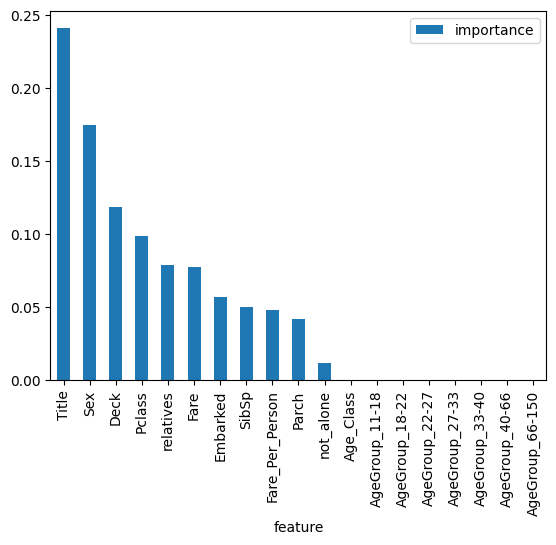

In [174]:
importances.plot.bar()

In [175]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Assuming your target variable is 'Survived'
X = train_df.drop(['Survived', 'Age'], axis=1)  # Drop 'Age' column
y = train_df['Survived']

# Convert 'Age' to 'AgeGroup' based on the provided code
age_bins = [0, 11, 18, 22, 27, 33, 40, 66, 150]
age_labels = [f'{i}-{j}' for i, j in zip(age_bins[:-1], age_bins[1:])]
X['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Encode 'AgeGroup' using one-hot encoding
X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)

# Convert string labels to numerical labels for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure that the testing data has the same columns as the training data
# You may need to preprocess 'test_df' similarly to 'train_df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=10, scoring="accuracy")

# Print the results
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.81944444 0.80555556 0.83098592 0.88732394 0.81690141 0.76056338
 0.8028169  0.8028169  0.83098592 0.91549296]
Mean: 0.8272887323943662
Standard Deviation: 0.04207531848182168


In [184]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Assuming your target variable is 'Survived'
X = train_df.drop(['Survived', 'Age'], axis=1)  # Drop 'Age' column
y = train_df['Survived']

# Convert 'Age' to 'AgeGroup' based on the provided code
age_bins = [0, 11, 18, 22, 27, 33, 40, 66, 150]
age_labels = [f'{i}-{j}' for i, j in zip(age_bins[:-1], age_bins[1:])]
X['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Encode 'AgeGroup' using one-hot encoding
X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)

# Convert string labels to numerical labels for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure that the testing data has the same columns as the training data
# You may need to preprocess 'test_df' similarly to 'train_df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=10, scoring="accuracy")

# Print the results
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.83333333 0.80555556 0.8028169  0.87323944 0.81690141 0.8028169
 0.81690141 0.83098592 0.83098592 0.92957746]
Mean: 0.8343114241001566
Standard Deviation: 0.037457990507342026


In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming 'train_df' is your DataFrame containing the data

# Assuming your target variable is 'Survived'
X = train_df.drop(['Survived', 'Age'], axis=1)  # Drop 'Age' column
y = train_df['Survived']

# Create 'AgeGroup' based on the provided code
age_bins = [0, 11, 18, 22, 27, 33, 40, 66, 150]
age_labels = [f'{i}-{j}' for i, j in zip(age_bins[:-1], age_bins[1:])]
X['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Encode 'AgeGroup' using one-hot encoding
X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)

# Convert string labels to numerical labels for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure that the testing data has the same columns as the training data
# You may need to preprocess 'test_df' similarly to 'train_df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=10, scoring="accuracy")

# Print the results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate and print the accuracy score on the test set
acc_rf = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", acc_rf)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Cross-Validation Scores: [0.86111111 0.80555556 0.8028169  0.87323944 0.83098592 0.78873239
 0.8028169  0.81690141 0.83098592 0.91549296]
Mean Accuracy: 0.8328638497652582
Standard Deviation: 0.037438595833089464
Accuracy on Test Set: 0.8111888111888111
Confusion Matrix:
[[75 12]
 [15 41]]


In [190]:
from sklearn.metrics import precision_score, recall_score

# Assuming 'rf' is your RandomForestClassifier model
predictions = cross_val_predict(rf, X_train, y_train, cv=3)

print("Precision:", precision_score(y_train, predictions))
print("Recall:", recall_score(y_train, predictions))


Precision: 0.7823834196891192
Recall: 0.7122641509433962


In [192]:
from sklearn.metrics import f1_score

X_train, predictions = X_train.align(pd.DataFrame(predictions, index=X_train.index), join='inner', axis=0)

f1 = f1_score(y_train, predictions)
print("F1 Score:", f1)


F1 Score: 0.745679012345679


In [201]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Assuming 'train_df' is your DataFrame containing the data

# Assuming your target variable is 'Survived'
X = train_df.drop(['Survived', 'Age'], axis=1)  # Drop 'Age' column
y = train_df['Survived']

# Create 'AgeGroup' based on the provided code
age_bins = [0, 11, 18, 22, 27, 33, 40, 66, 150]
age_labels = [f'{i}-{j}' for i, j in zip(age_bins[:-1], age_bins[1:])]
X['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Encode 'AgeGroup' using one-hot encoding
X = pd.get_dummies(X, columns=['AgeGroup'], drop_first=True)

# Convert string labels to numerical labels for the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure that the testing data has the same columns as the training data
# You may need to preprocess 'test_df' similarly to 'train_df'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=10, scoring="accuracy")

# Print the results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

# Make predictions on the test set
y_pred = cross_val_predict(rf, X, y, cv=10)

# Calculate and print various metrics on the test set
print("Accuracy on Test Set:", accuracy_score(y, y_pred))
print("Precision on Test Set:", precision_score(y, y_pred))
print("Recall on Test Set:", recall_score(y, y_pred))
print("F1 Score on Test Set:", f1_score(y, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Cross-Validation Scores: [0.86111111 0.80555556 0.8028169  0.87323944 0.83098592 0.78873239
 0.8028169  0.81690141 0.83098592 0.91549296]
Mean Accuracy: 0.8328638497652582
Standard Deviation: 0.037438595833089464
Accuracy on Test Set: 0.8328651685393258
Precision on Test Set: 0.8091286307053942
Recall on Test Set: 0.7276119402985075
F1 Score on Test Set: 0.7662082514734774
Confusion Matrix:
[[398  46]
 [ 73 195]]
